## EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Datasets/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**بررسی وجود داده های گم شده**

In [4]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

**بررسی پارامتر های آماری**

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**تصویر سازی و رسم رابطه هر ویژگی با خروجی**

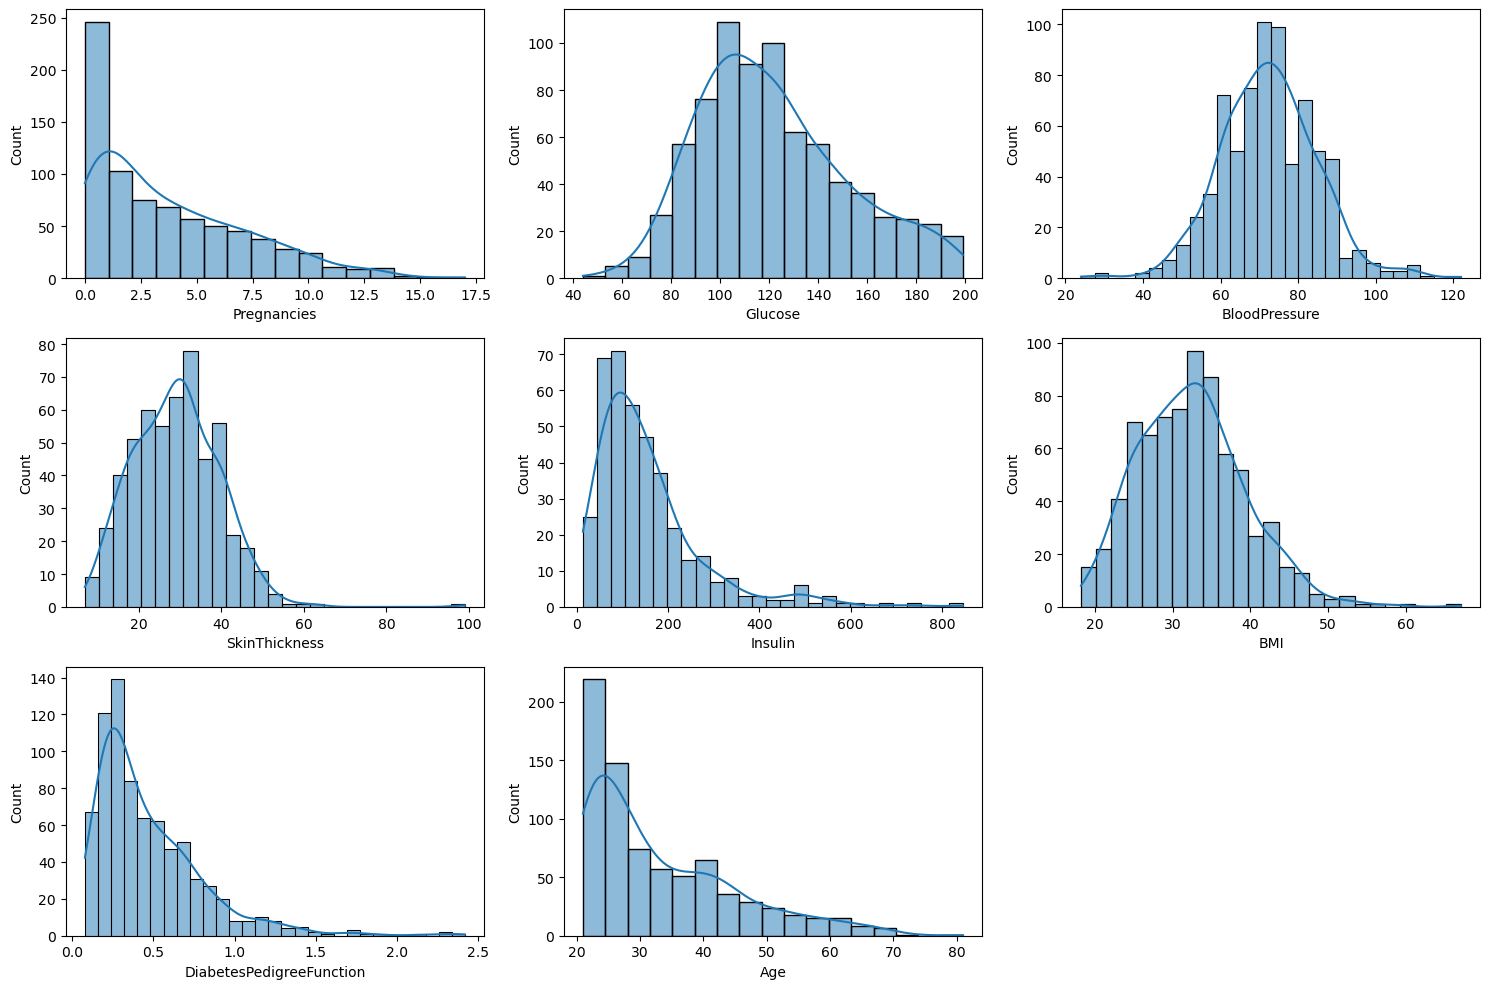

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True)
plt.tight_layout()
plt.show()

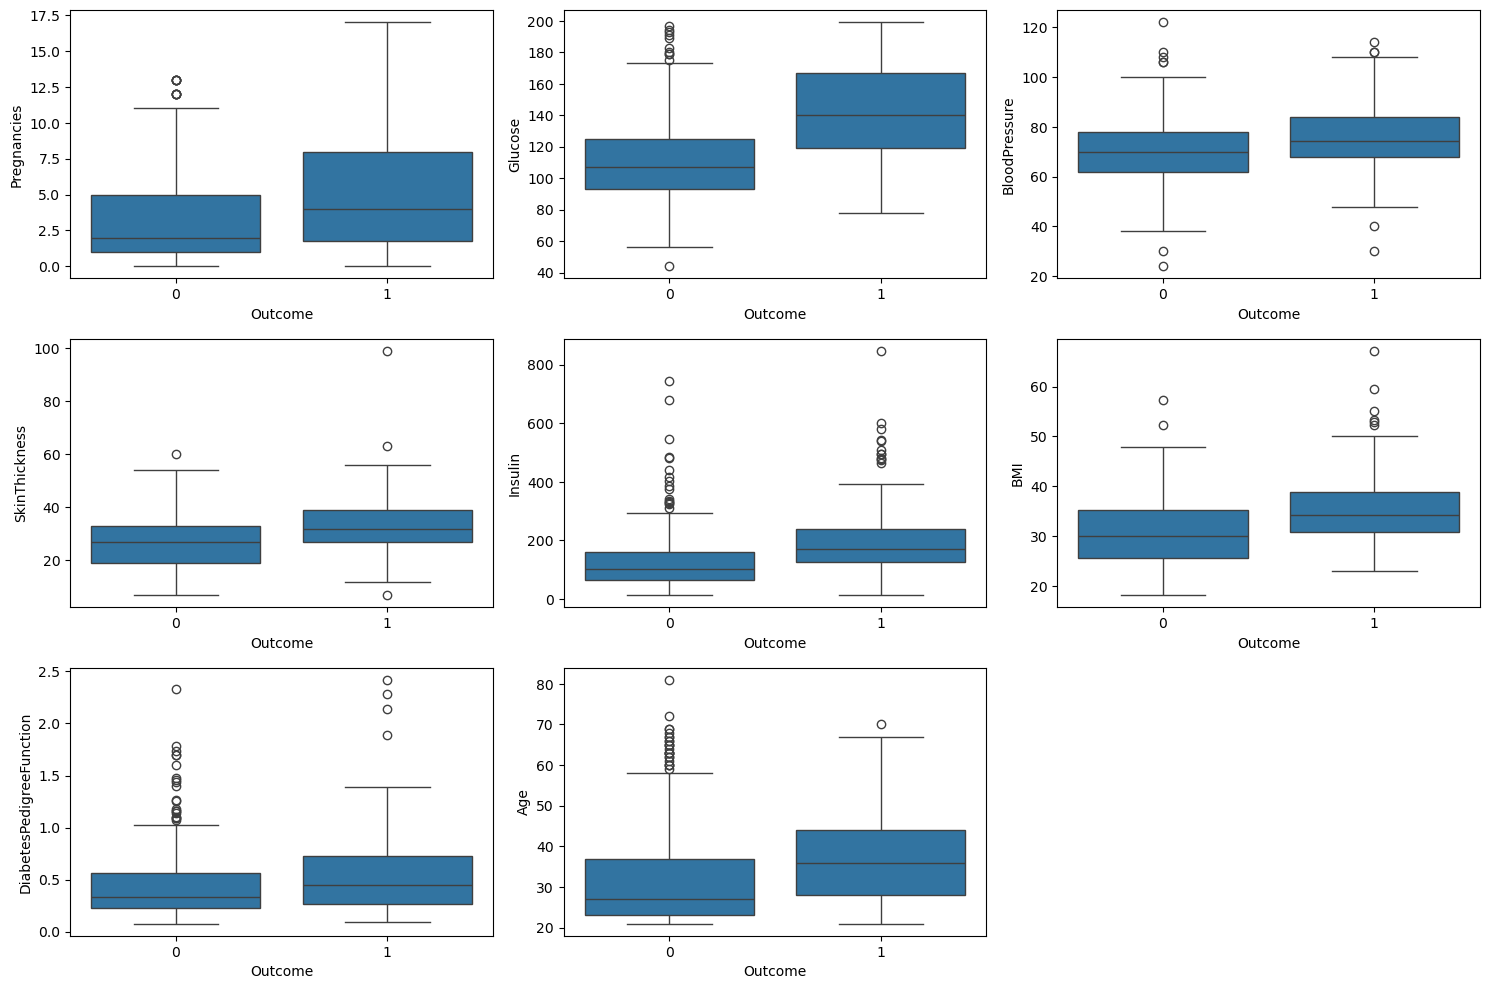

In [8]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data, x='Outcome', y=col)
plt.tight_layout()
plt.show()

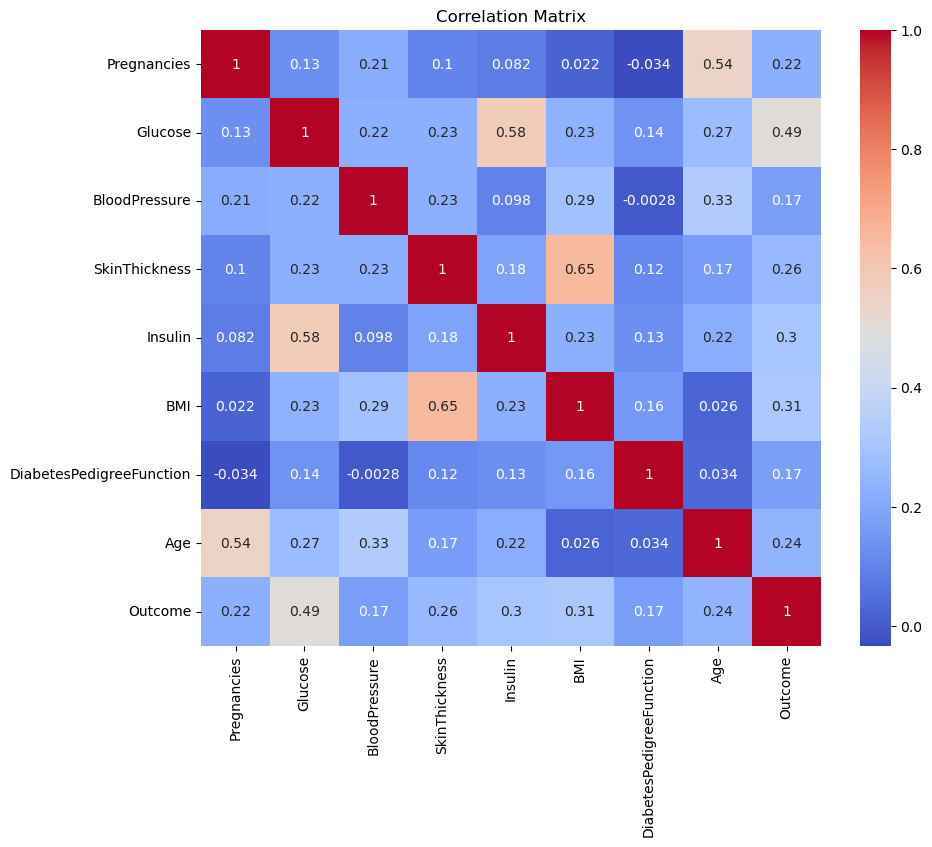

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

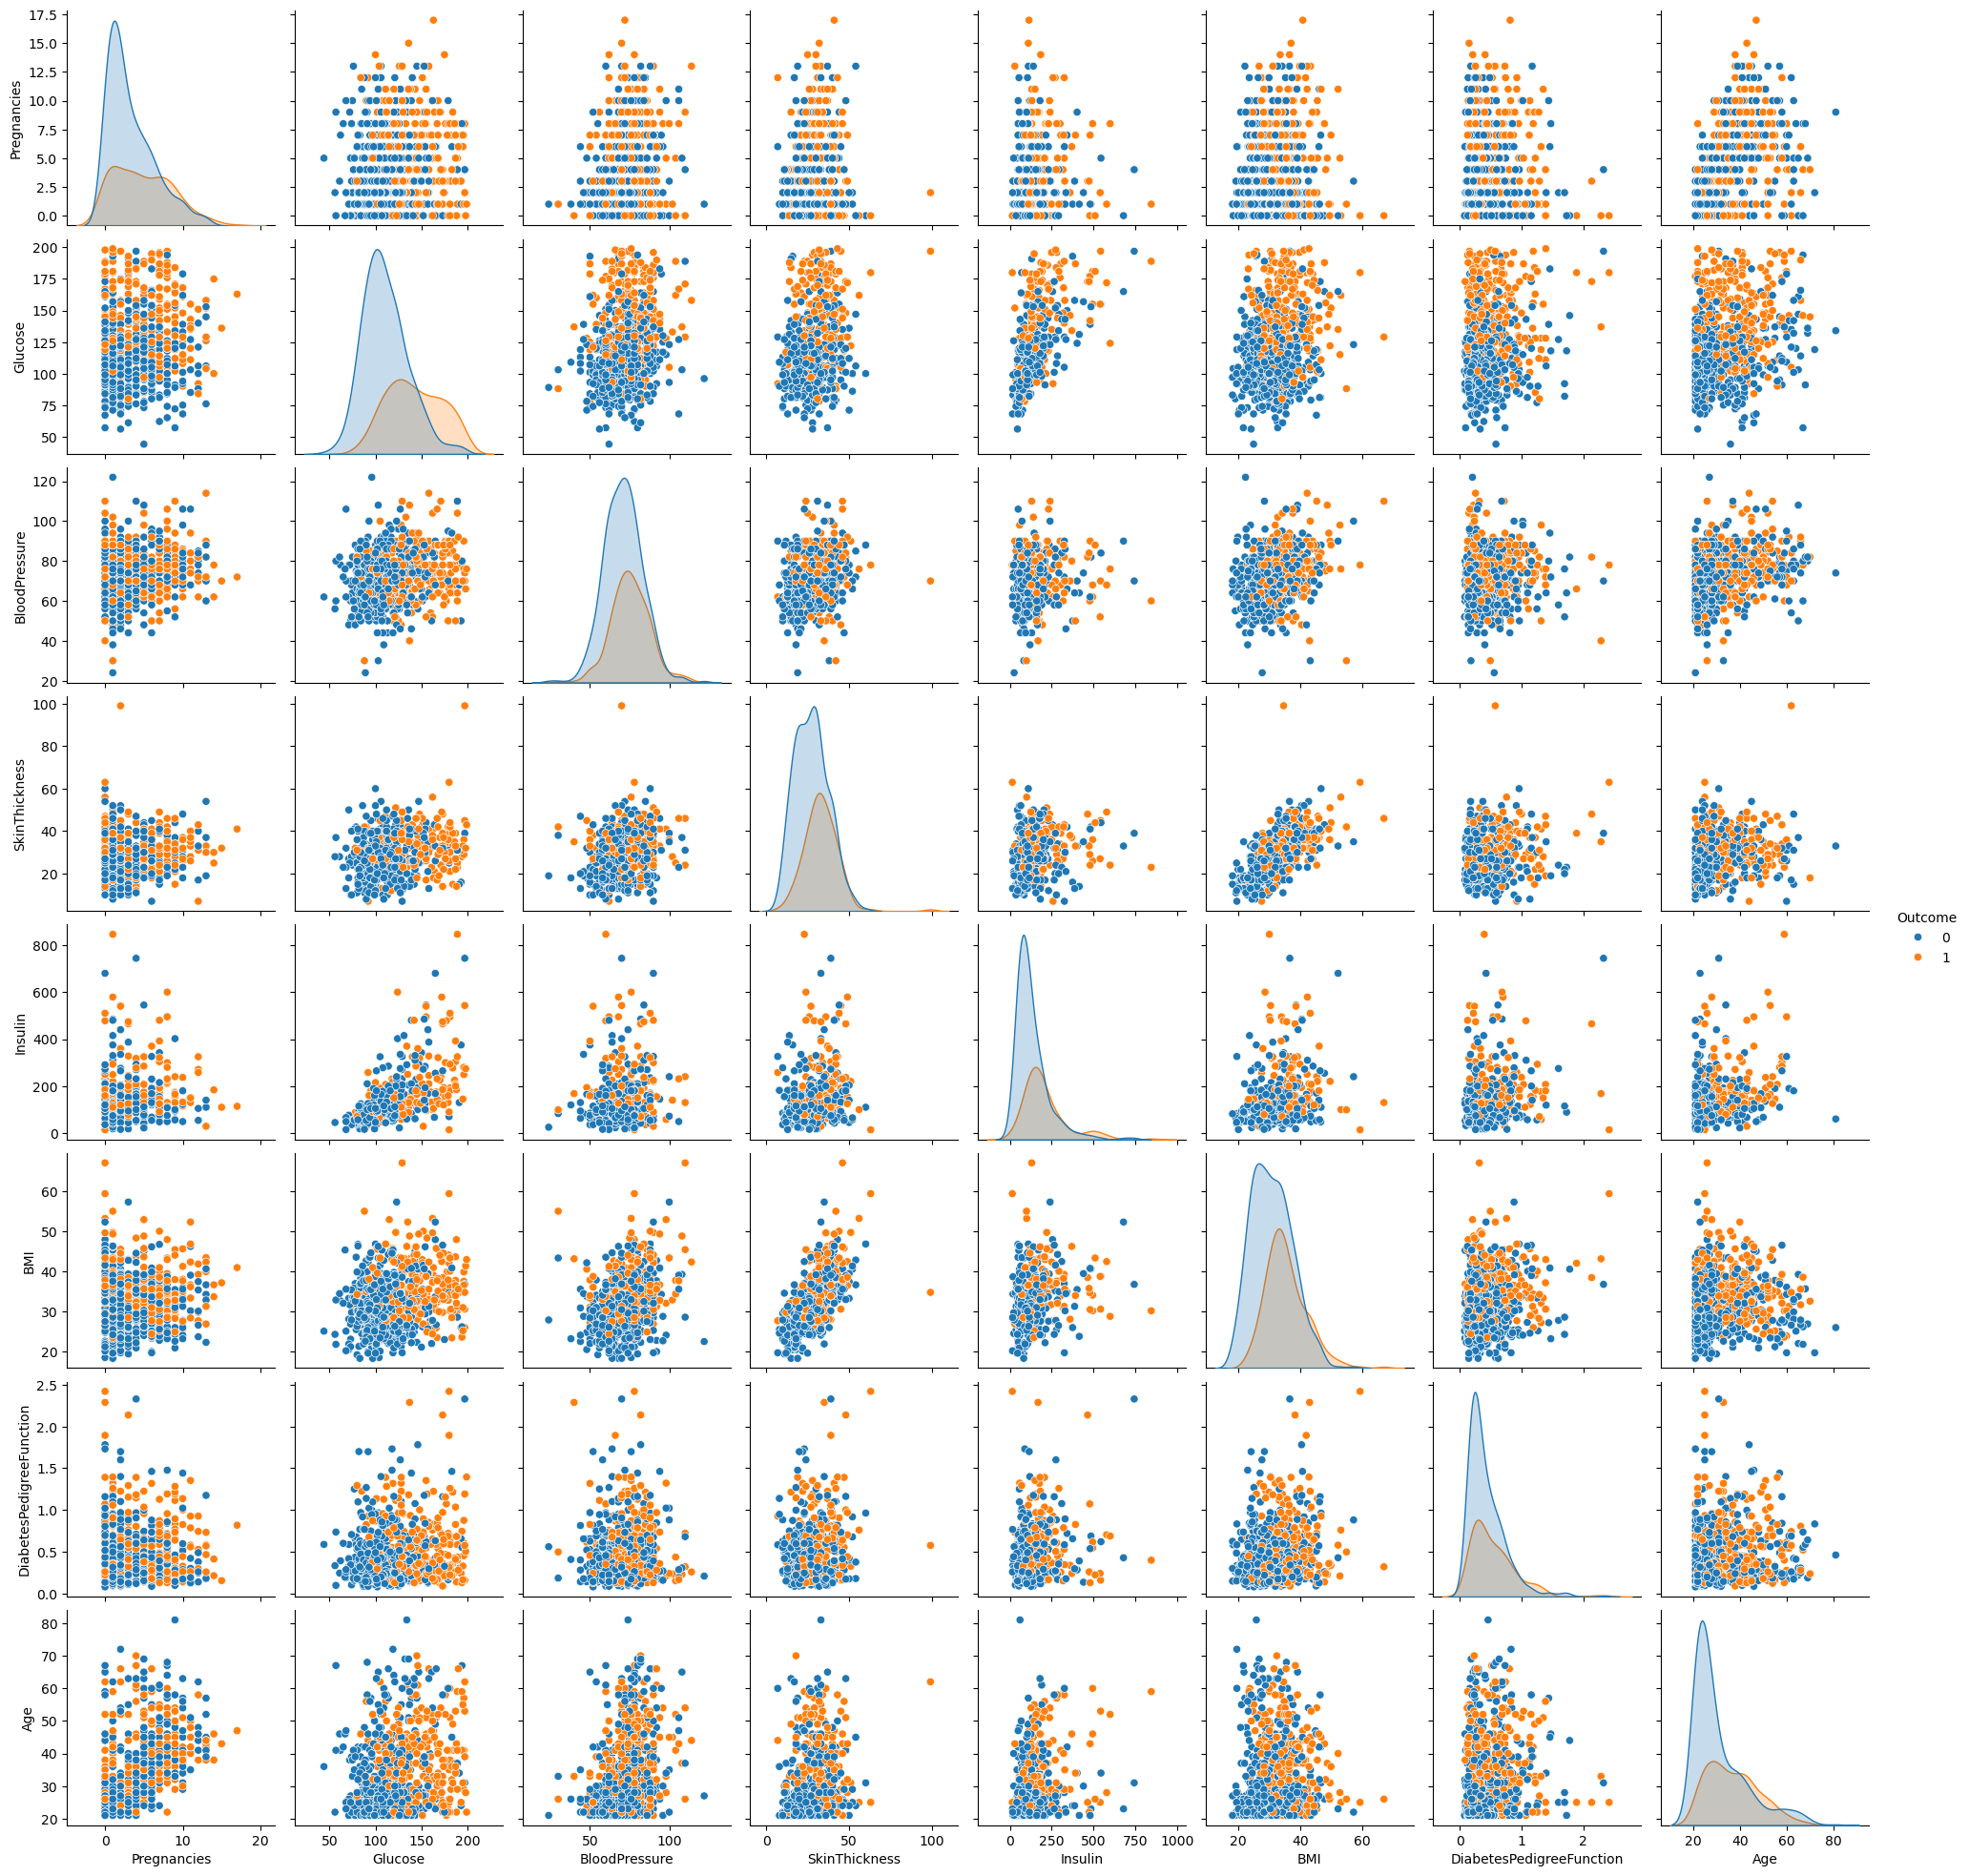

In [10]:
sns.pairplot(data, hue="Outcome", diag_kind="kde")
plt.show()

## ب) پیش پردازش

**مدیریت داده های گم شده**

In [11]:
data = data.fillna(data.mean())

**حذف داده های پرت**

In [12]:
def remove_outliers_iqr(data, columns):
    for col in columns: 
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# data = remove_outliers_iqr(data.copy(), data.columns[:-1])

## ج) طبقه بندی

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

In [14]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Training Set Results:
Accuracy: 0.7899022801302932
Precision: [0.80542986 0.75      ]


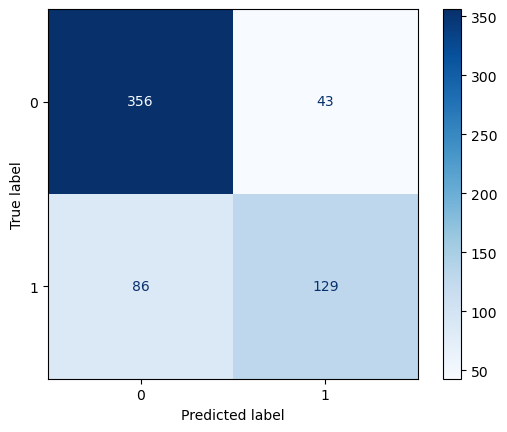

In [16]:
y_train_pred = model.predict(X_train)

print("Training Set Results:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, average=None))

ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred)).plot(cmap='Blues')


Testing Set Results:
Accuracy: 0.7272727272727273
Precision: [0.76576577 0.62790698]


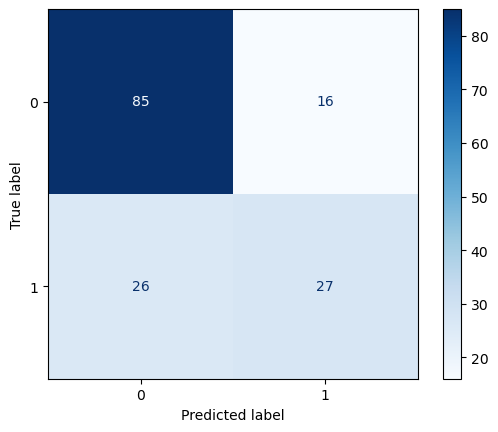

In [17]:
y_test_pred = model.predict(X_test)

print("\nTesting Set Results:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average=None))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot(cmap='Blues')

## د) نرمال سازی

### ۱. نرمال‌سازی (Normalization)

In [18]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_normalized = minmax_scaler.fit_transform(X_train)
X_test_normalized = minmax_scaler.transform(X_test)

model_normalized = LogisticRegression(max_iter=1000)
model_normalized.fit(X_train_normalized, y_train)

LogisticRegression(max_iter=1000)

Training Set Results:
Accuracy: 0.7899022801302932
Precision: [0.8        0.76219512]


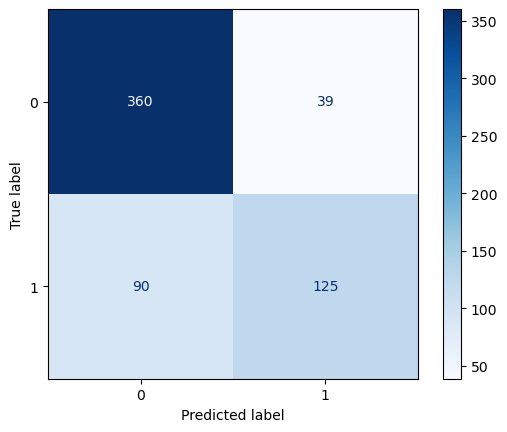

In [19]:
y_train_pred_normalized = model_normalized.predict(X_train_normalized)

print("Training Set Results:")
print("Accuracy:", accuracy_score(y_train, y_train_pred_normalized))
print("Precision:", precision_score(y_train, y_train_pred_normalized, average=None))

ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred_normalized)).plot(cmap='Blues')


Testing Set Results:
Accuracy: 0.7207792207792207
Precision: [0.75438596 0.625     ]


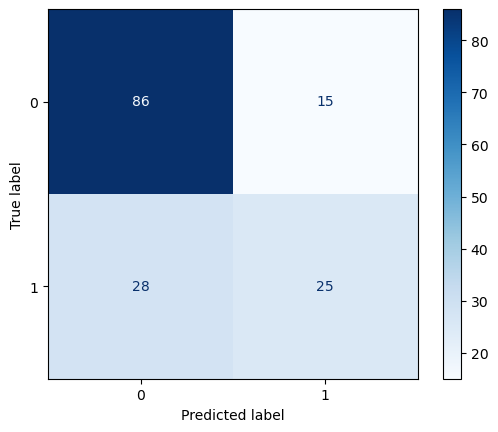

In [20]:
y_test_pred_normalized = model_normalized.predict(X_test_normalized)

print("\nTesting Set Results:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_normalized))
print("Precision:", precision_score(y_test, y_test_pred_normalized, average=None))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_normalized)).plot(cmap='Blues')

### ۲. استانداردسازی (Standardization)

In [21]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

model_standardized = LogisticRegression(max_iter=1000)
model_standardized.fit(X_train_standardized, y_train)

LogisticRegression(max_iter=1000)

Training Set Results:
Accuracy: 0.7882736156351792
Precision: [0.80498866 0.74566474]


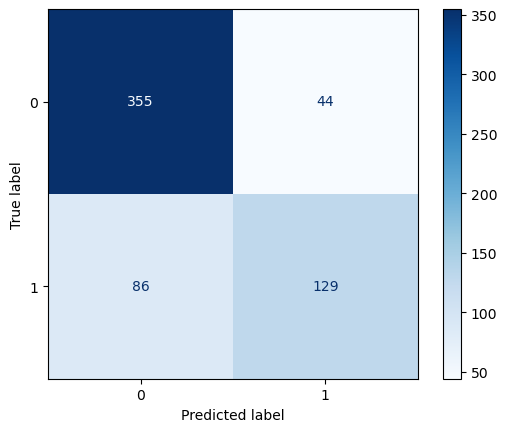

In [22]:
y_train_pred_standardized = model_standardized.predict(X_train_standardized)

print("Training Set Results:")
print("Accuracy:", accuracy_score(y_train, y_train_pred_standardized))
print("Precision:", precision_score(y_train, y_train_pred_standardized, average=None))

ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred_standardized)).plot(cmap='Blues')

Training Set Results:
Accuracy: 0.7272727272727273
Precision: [0.76576577 0.62790698]


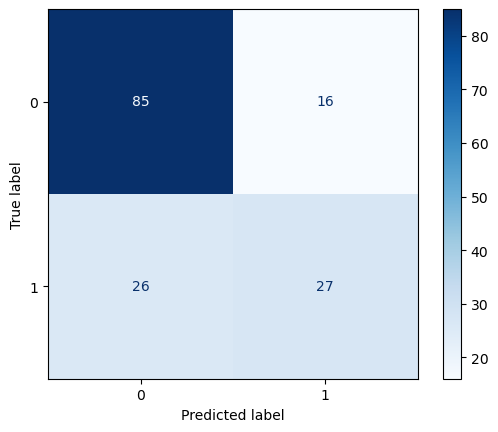

In [23]:
y_test_pred_standardized = model_standardized.predict(X_test_standardized)

print("Training Set Results:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_standardized))
print("Precision:", precision_score(y_test, y_test_pred_standardized, average=None))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_standardized)).plot(cmap='Blues')